In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib as mpl     
from sklearn.decomposition import PCA
from scipy.stats import *
from __future__ import division
%matplotlib inline

In [2]:
df = pd.read_csv("final_df.csv")
df

,name,developer,publisher,positive,negative,owners_approx,average_playtime,mid_playtime,price,score,is_successful
0,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,5718191,761211,75000000.0,28846,6493,0.00,80.666667,1
1,Dota 2,Valve,Valve,1467658,297030,150000000.0,38219,964,0.00,90.000000,1
2,Grand Theft Auto V,Rockstar North,Rockstar Games,1153983,208800,35000000.0,12460,6441,14.80,96.800000,1
3,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1146769,892200,75000000.0,21155,6620,0.00,22.198804,0
4,Terraria,Re-Logic,Re-Logic,951689,20646,35000000.0,6126,1739,4.99,82.400000,1
...,...,...,...,...,...,...,...,...,...,...,...
9576,Sands of Fire,Three-Sixty Pacific,Ziggurat,1,0,350000.0,0,0,3.49,1.000000,0
9577,Modern Arena,Indie,Indie,1,1,75000.0,0,0,0.00,50.000000,0
9578,Zephyr,New World Computing,Ziggurat,1,0,75000.0,0,0,4.54,1.000000,0
9579,Squares,Jason Swisher,Jason Swisher,1,0,150000.0,0,0,0.99,1.000000,0


Text(0.5, 1.0, 'price')

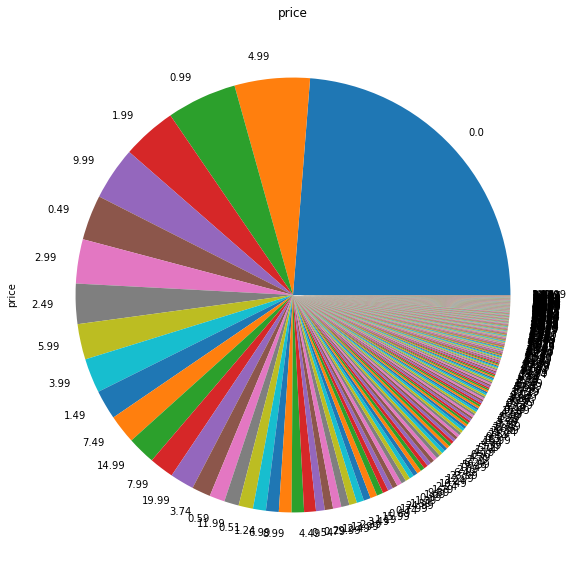

In [11]:
plt.figure(figsize = (15,10))
df['price'].value_counts().plot(kind='pie')
plt.title('price')

C:\Program Files\Andconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

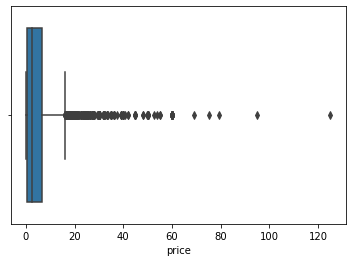

In [3]:
sns.boxplot(df.price)

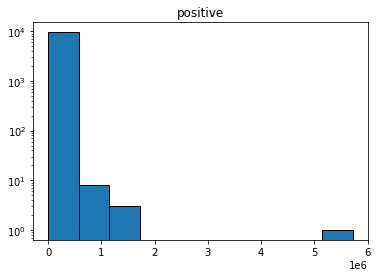

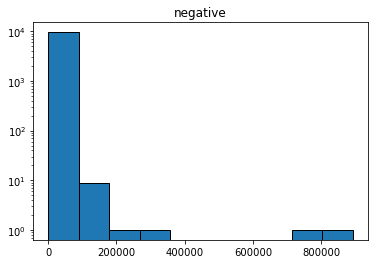

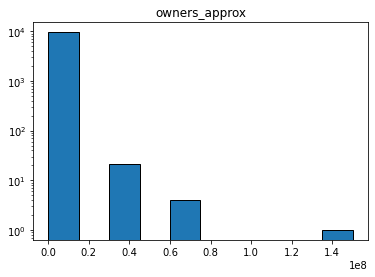

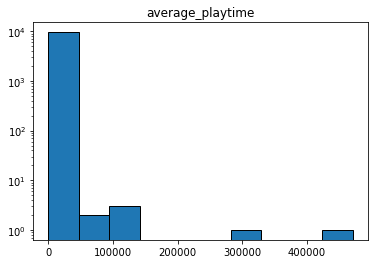

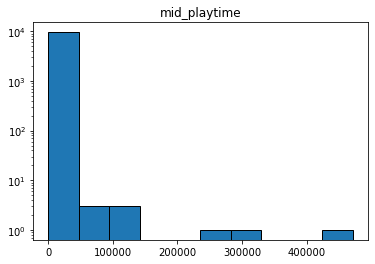

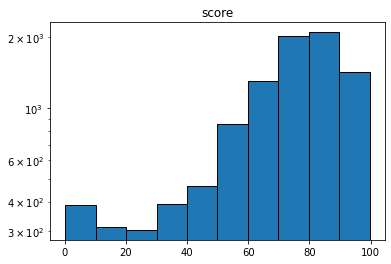

In [4]:
numeric_cols = ['positive', 'negative', 'owners_approx', 'average_playtime', 'mid_playtime', 'score']

for item in numeric_cols:
    plt.figure()
    plt.hist(df[item], edgecolor='black')
    plt.title(item)
    plt.yscale("log")

numeric_cols_without_score = ['positive', 'negative', 'owners_approx', 'average_playtime', 'mid_playtime', 'price']
print("correlation between score to all other columns: \n")
for item in numeric_cols_without_score:
    print(item + ': ' + str(df['score'].corr(df[item], method="spearman")))
    plt.figure()
    plt.scatter(df['score'], df[item])
    plt.title(item + " and score")

<AxesSubplot:ylabel='is_successful'>

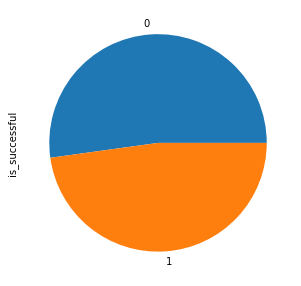

In [6]:
plt.figure(figsize = (10,5))
df['is_successful'].value_counts().plot(kind='pie')

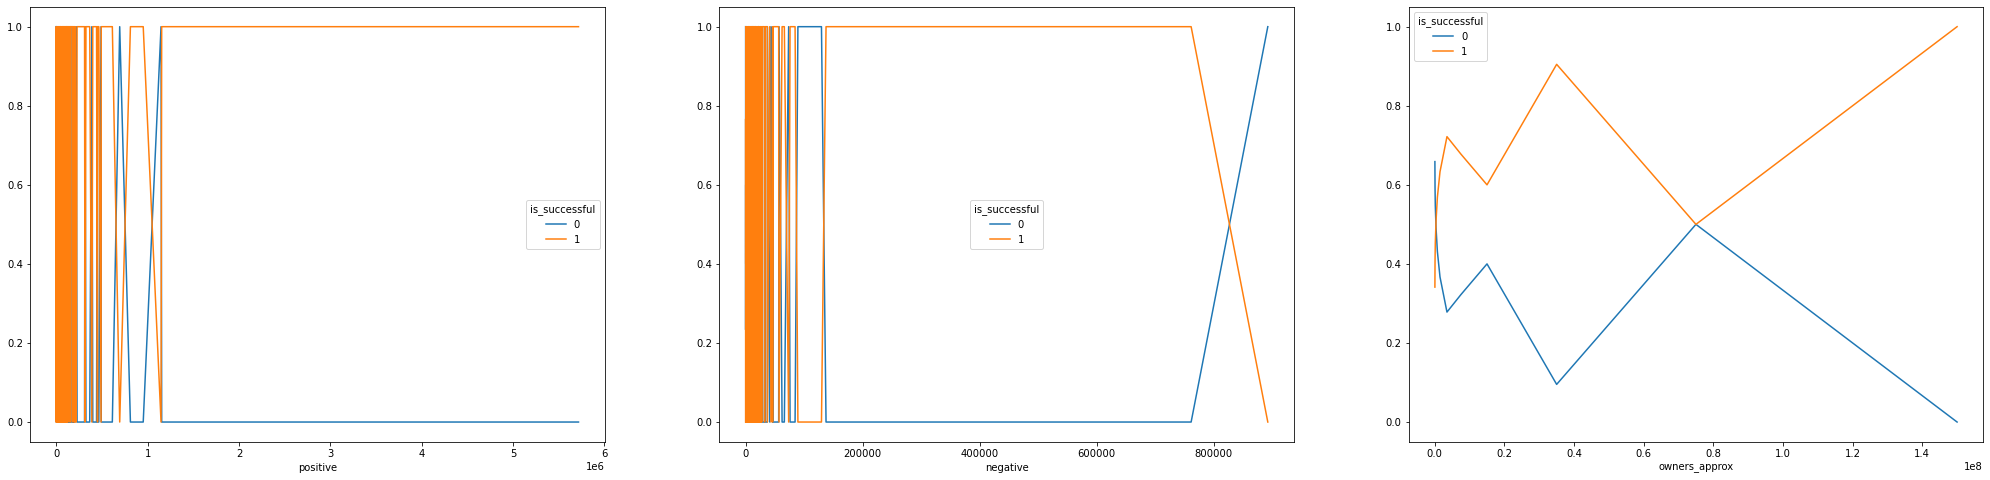

In [7]:
def one_dim_plot(sr,plot_type,axis):
    return(sr.plot(kind=plot_type,ax=axis))

def plot_crosstab(df,col_names,other_col_name):
    axis=len(col_names)
    fig,axes=plt.subplots(1,axis,figsize=(35,8))
    for index in range(len(col_names)):
        c1=pd.crosstab(df[col_names[index]],df[other_col_name],normalize='index')
        one_dim_plot(c1,'line',axes[index])
        
col_names=['positive', 'negative', 'owners_approx'] 
other_col_name='is_successful'
plot_crosstab(df,col_names,other_col_name)

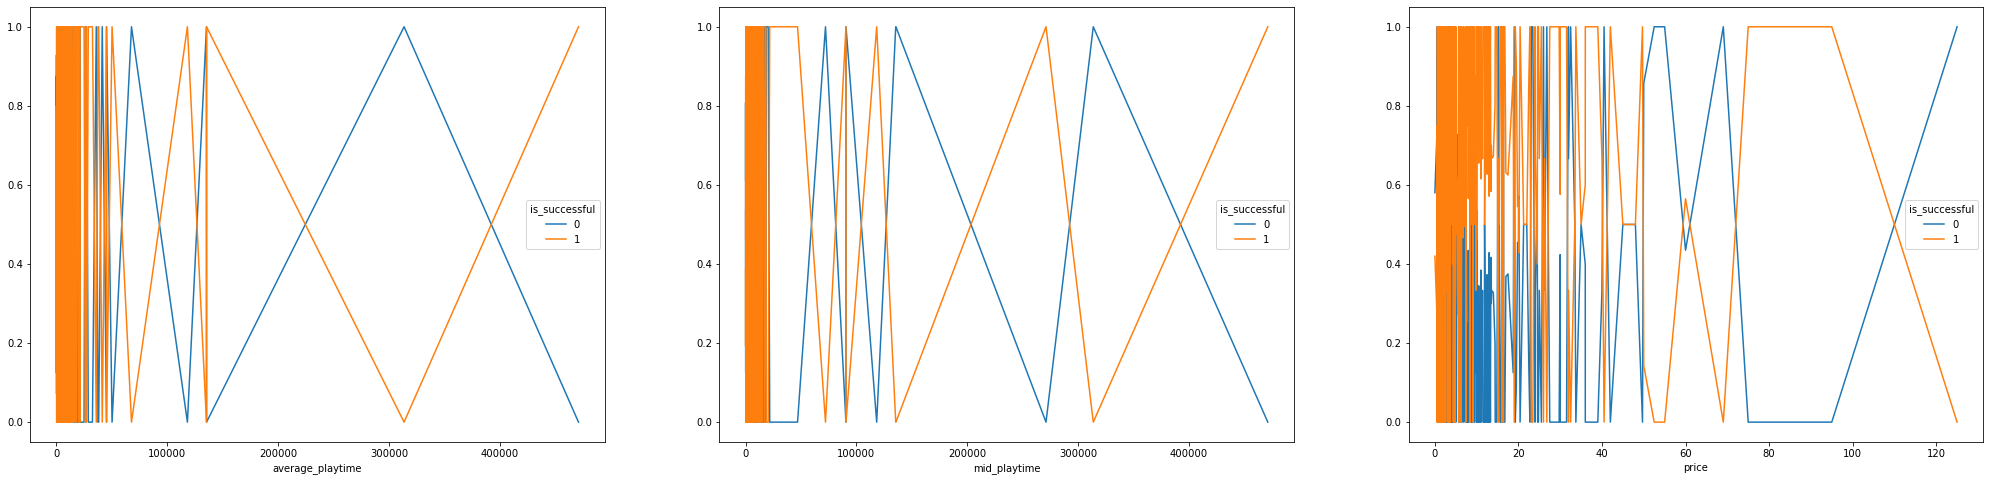

In [9]:
col_names=['average_playtime', 'mid_playtime', 'price']
other_col_name='is_successful'
plot_crosstab(df,col_names,other_col_name)

correlation between score to all other columns: 

positive: 0.4654685077000914
negative: 0.030247202294502614
owners_approx: 0.16447987918614784
average_playtime: 0.18311566246288108
mid_playtime: 0.1634071647141538
price: 0.1918321745459695


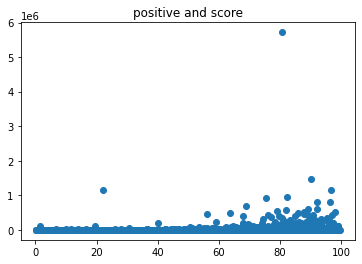

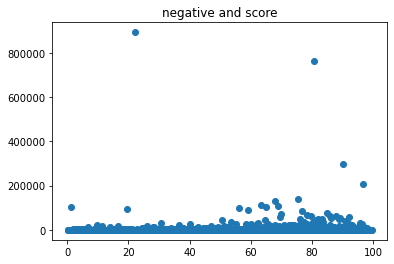

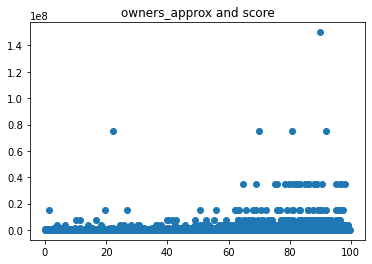

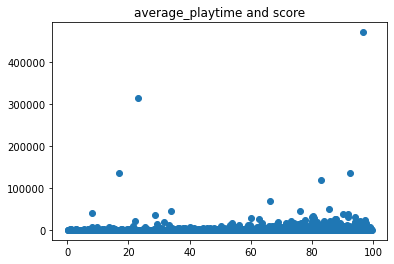

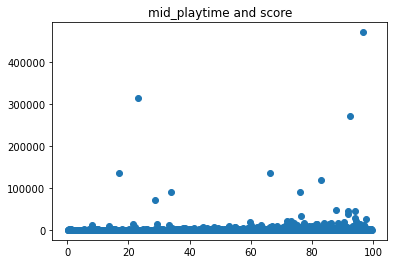

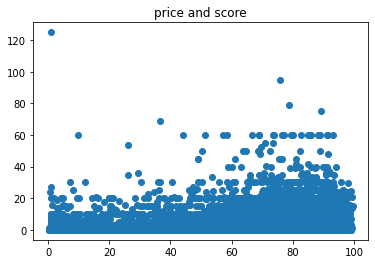

In [20]:
numeric_cols_without_score = ['positive', 'negative', 'owners_approx', 'average_playtime', 'mid_playtime', 'price']
print("correlation between score to all other columns: \n")
for item in numeric_cols_without_score:
    print(item + ': ' + str(df['score'].corr(df[item], method="spearman")))
    plt.figure()
    plt.scatter(df['score'], df[item])
    plt.title(item + " and score")